In [1]:
from matplotlib.ticker import StrMethodFormatter
from scipy.interpolate import make_interp_spline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def get_profdata(infile='./TProfs.csv'):
    """Load the pixel position and height data."""
    df = pd.read_csv(infile, skipinitialspace=True)
    df.columns = df.columns.str.replace(' ','')
    return df

def make_domespline(xpts, ypts):
    """Create the function needed to draw the '0430 dome' 
    Function adapted from: https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/  
    """
    
    
    x = np.array(xpts)
    y = np.array(ypts)

    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    return X_, Y_

def altfunc(pres):
    """Calculates altitude from pressure to use on 2nd y axis.
    NOTE: This is accurate to only ~5%.
    It shouldn't be used for scientific calculations but is fine for a relatively coarse axis.
    """
    return -6938. * np.log(pres) + 48540.

def invaltfunc(height):
    """Calculates pressure from altitude to use on 2nd y axis.
    NOTE: This is accurate to only ~5%.
    It shouldn't be used for scientific calculations but is fine for a relatively coarse axis.
    """
    return np.exp((48540-height)/6938)

In [3]:
tprof = get_profdata()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


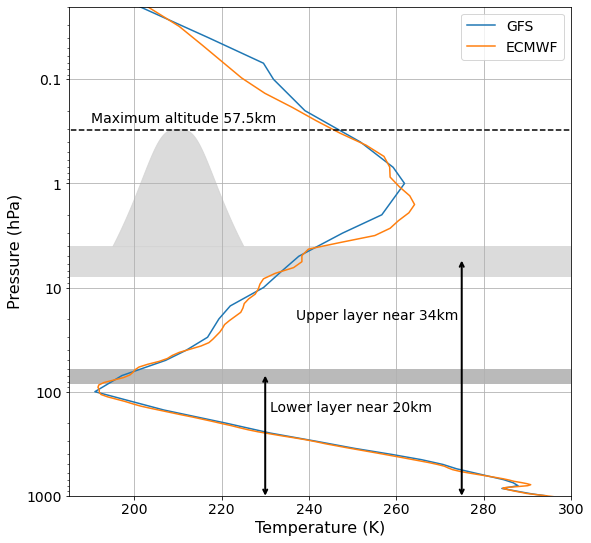

In [6]:
# Set up arrow dict needed for double-headed arrows
adict = dict(facecolor='black', linewidth=2, shrinkA=0., shrinkB=0., arrowstyle='<->')

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(9,9))
ax.set_yscale('log');
ax.set_ylim(0.02, 1000);
ax.set_xlim(185, 300);
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:g}'));
ax.tick_params(axis='both', which='major', labelsize=14);
plt.gca().invert_yaxis();
ax.grid();
ax.set_xlabel('Temperature (K)', fontsize=16);
ax.set_ylabel('Pressure (hPa)', fontsize=16);

# Plot the profiles
ax.plot(tprof['GFS_T'], tprof['GFS_Pres'], label='GFS')
ax.plot(tprof['ECM_T_00'], tprof['ECM_Pres'], label='ECMWF')

# Add some cloud representations
rect1 = patches.Rectangle((180, 60), 120, 25, linewidth=1, facecolor='darkgrey', alpha=0.8)
rect2 = patches.Rectangle((180, 4), 120, 4, linewidth=1, facecolor='lightgrey', alpha=0.8);
xvals, yvals = make_domespline([195, 202, 210, 218, 225], [4, 0.85, 0.3, 0.85, 4]);
plt.fill_between(xvals, yvals, 4., alpha=0.8, color='lightgrey');
ax.add_patch(rect1);
ax.add_patch(rect2);

# Add lines and annotations
ax.plot((180, 300), (0.305, 0.305), c='black', linestyle='dashed')

plt.annotate('', xy=(230, 1000), xytext=(230, 70), arrowprops=adict,)
plt.text(231, 155, 'Lower layer near 20km', fontsize=14);

plt.annotate('', xy=(275, 1000), xytext=(275, 5.5), arrowprops=adict,)
plt.text(237, 20, 'Upper layer near 34km', fontsize=14);

plt.text(190, 0.26, 'Maximum altitude 57.5km', fontsize=14);

plt.legend(prop={'size': 14})

plt.savefig('./Fig3/Figure_3.png', facecolor='white')
plt.savefig('./Fig3/Figure_3.eps', format='eps', facecolor='white')